### 분할 군집분석(K-평균 군집분석)

In [31]:
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

hannanum = Hannanum()



from konlpy.tag import Okt
okt = Okt()


# 불용어 사전 읽기
# Txt 파일의 형태는 ANSI, EUC-KR로 인코딩 되어 한다.
with open("C:\\Users\\user\\Documents\\PythonTest\\Dic\\StopWordKorean.txt", 'r') as r_file:
    #파일을 연다. 문장 단위로 끊어 읽는다. 
    kr_stop =  r_file.read().splitlines()
    
# punctuation는 [, ], ? 등 기호 리스트 이다.
from string import punctuation
stop_words = [set(kr_stop + list(punctuation))]

#분류 대상 파일을 읽어온다
Data = pd.read_csv('C:\\Users\\user\\Documents\\PythonTest\\Data\\(18-25)정치경제.csv',engine="python")

Data.head()



NO  Unnamed: 0 Menu subMenu news_from  \
0   1           0   정치    청와대     파이낸셜뉴스   
1   2           1   정치  국회/정당        뉴시스   
2   3           2   정치     북한        한겨레   
3   4           3   정치     행정       연합뉴스   
4   5           4   정치  국방/외교        더팩트   

                           _press_title  \
0  文대통령 "'오월 정신'은 모두의 것...국가폭력 진상 밝혀내야"   
1    통합당 "5·18 발언 사과…희생 헛되지 않게 발벗고 나서야"   
2       보훈처, ‘6·25 참전’ 나바호족에 마스크 1만장 지원   
3       조길형 충주시장 "수안보연수원 매입 절차 누락 내 책임"   
4             북한 선전매체 "5·18 대학살자들 청산해야"   

                                      _press_content  
0  -5·18민주화운동?기념식?참석...취임?후?3번째-국가기념일?지정?후?첫?5·18...  
1  "짐작할 수 없는 슬픔 속에 사는 유가족에 위로""해야 할 일 분명…주호영 광주 방...  
2  6·25 전쟁에 참전했던 미국의 원주민 나바호족 용사들에게 마스크 1만장과 손소독제...  
3  시의회 강도 높은 질책에 "모든 조사 겸허히 받겠다" 사과   (충주=연합뉴스) 박...  
4  북한이 5·18 민주화운동 40주년인 18일을 맞아 철저한 진상규명과 책임자들에 대...

In [43]:
hannanum_docs = []
okt_docs = []




#문장에서 명사만 추출하여 리스트로 생성 한다.
for i in Data['_press_content']:
    hannanum_docs.append(hannanum.nouns(i))

#추출된 명사 리스트를 문장을 되돌린다
for i in range(len(hannanum_docs)):
    hannanum_docs[i] = ' '.join(hannanum_docs[i])    



#문장에서 명사만 추출하여 리스트로 생성 한다.
for i in Data['_press_content']:
    okt_docs.append(okt.nouns(i))
    
#추출된 명사 리스트를 문장을 되돌린다
for i in range(len(okt_docs)):
    okt_docs[i] = ' '.join(okt_docs[i])     


print("hannanum_docs=", len(hannanum_docs), "okt_docs=", len(okt_docs),) 


hannanum_docs= 84 okt_docs= 84


In [38]:
#추출한 명사 리스트를 벡터처리 한다.
vec_hannanum = CountVectorizer()
X_hannanum = vec_hannanum.fit_transform(hannanum_docs)

df_hannanum = pd.DataFrame(X_hannanum.toarray(), columns=vec_hannanum.get_feature_names())


#추출한 명사 리스트를 벡터처리 한다.
vec_okt = CountVectorizer()
X_okt = vec_okt.fit_transform(okt_docs)

df_okt = pd.DataFrame(X_okt.toarray(), columns=vec_okt.get_feature_names())


In [42]:
#K-평균 군집분석
kmeans_hannanum = KMeans(n_clusters=2).fit(df_hannanum)
sum_i_1=0
sum_i_0=0

for i in range(len(kmeans_hannanum.labels_)) :
    if kmeans_hannanum.labels_[i] == 1 :
        sum_i_1=sum_i_1 +1
    else  :
        sum_i_0= sum_i_0+1
        
#K-평균 군집분석
kmeans_okt = KMeans(n_clusters=2).fit(df_okt)
sum_i_1=0
sum_i_0=0

for i in range(len(kmeans_okt.labels_)) :
    if kmeans.labels_[i] == 1 :
        sum_i_1=sum_i_1 +1
    else  :
        sum_i_0= sum_i_0+1        
   
print("total_hannanum = ",len(kmeans.labels_)," sum_i_1=", sum_i_1, "  sum_i_0=",sum_i_0)


print("total_okt = ",len(kmeans_okt.labels_)," sum_i_1=", sum_i_1, "  sum_i_0=",sum_i_0)

total_hannanum =  84  sum_i_1= 83   sum_i_0= 1
total_okt =  84  sum_i_1= 83   sum_i_0= 1


In [28]:

#클러스터 수를 확인
print(kmeans.n_clusters)

#클러스터의 분류 값 배열을 확인
print(kmeans.labels_)

#Number of iterations run.
print(kmeans.n_iter_)

# print(cluster.children_)



2
[0 1]
1


In [29]:
#군집화된 결과를 배열화 한다.
resl = pd.DataFrame({'text' : Data['_press_content'], 'cluster' : kmeans.labels_})

resl


text  cluster
0  -5·18민주화운동?기념식?참석...취임?후?3번째-국가기념일?지정?후?첫?5·18...        0
1  지난 15일 한화손해보험 임직원들이 여의도사옥에서 대회의실에서 홀몸 어르신을 위한 ...        1

In [30]:

#클러스터 순으로 소팅한다.
resl2 = resl.sort_values(by=['cluster'],ascending=False)
resl2


text  cluster
1  지난 15일 한화손해보험 임직원들이 여의도사옥에서 대회의실에서 홀몸 어르신을 위한 ...        1
0  -5·18민주화운동?기념식?참석...취임?후?3번째-국가기념일?지정?후?첫?5·18...        0

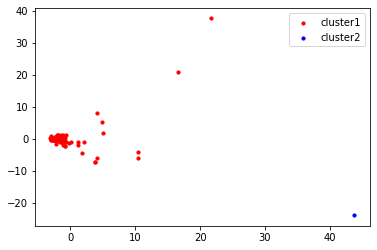

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt





pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])





principalDf.index=Data['_press_content']





kmeans.labels_ == 0





# x축 : first y출 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
#plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()


